# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [1]:
import matplotlib.pyplot as plt
import os

In [2]:
#import sys
#!{sys.executable} -m pip install imageio[ffmpeg]

In [22]:
import numpy as np

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points ----> aumentandolo si alza... diminuendo quindi dx
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5 # ----> aumentandolo si abbassa di più...
dt = cf*dx/a   # Time step   
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
u_initial = np.empty(len(x))

index = 0
for x_i in x:
    if ((x_i >= 4) and (x_i<= 6) ):
        u_initial[index] = 1
    else:
        u_initial[index] = 0
    index = index +1
# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [23]:
##create directory where to save images
print(os.getcwd())

os.makedirs('./images_lax-wendroff')

os.listdir('./')

/home/malvi/Documents/numerical relativity/numerical_rel/Advection/adv_eq_step_function


['l2norm_LAXWENDROFF.dat',
 'movie.mp4',
 '.ipynb_checkpoints',
 'l2norm_LAX.dat',
 'Advection_equation_LAX-FRIEDRICHS-Step_function.ipynb',
 'comparison.txt',
 'Advection_equation_Lax-Wendroff_Step_function.ipynb',
 'l2norm_FTCS.dat',
 'images_lax-wendroff',
 'l2norm_dx_0.05_dt_0.025.py',
 'l2norm_LEAPFROG.dat']

In [24]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./images_lax-wendroff/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    
    #LAX-WENDROFF METHOD:
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))+ a**2*dt**2/(2*dx**2)*(np.roll(u_current, -1) - 2 *u_current + np.roll(u_current, 1))  #if I'm not using python I need to wrtie the boundary cond...  
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig('./images_lax-wendroff/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()
        
file = open('l2norm_dx_'+ str(dx)+ '_dt_'+ str(dt)+'.py', 'w')
file.write(str(l2norm))
file.close()


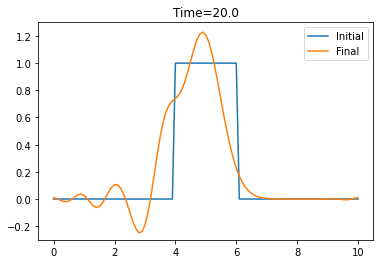

In [25]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(-0.3,1.3)
plt.legend()
plt.show()


# for the comparison: use the same number of points!!

In [26]:
solutions_comparison = open("comparison.txt", "a")

solutions_comparison.write("lax-wendroff: " + str(u_initial) + str(u_current) + "\n")

solutions_comparison.close()

In [27]:
# set the directory where your images are stored
directory = "./images_lax-wendroff/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)




['fig_00300.png', 'fig_00290.png', 'fig_00350.png', 'fig_00150.png', 'fig_00270.png', 'fig_00130.png', 'fig_00320.png', 'fig_00180.png', 'fig_00230.png', 'fig_00210.png', 'fig_00110.png', 'fig_00120.png', 'fig_00400.png', 'fig_00240.png', 'fig_00310.png', 'fig_00330.png', 'fig_00390.png', 'fig_00340.png', 'fig_00020.png', 'fig_00060.png', 'fig_00100.png', 'fig_00040.png', 'fig_00010.png', 'fig_00260.png', 'fig_00080.png', 'fig_00370.png', 'fig_00170.png', 'fig_00160.png', 'fig_00050.png', 'fig_00090.png', 'fig_00030.png', 'fig_00360.png', 'fig_00280.png', 'fig_00000.png', 'fig_00190.png', 'fig_00070.png', 'fig_00200.png', 'fig_00250.png', 'fig_00380.png', 'fig_00140.png', 'fig_00220.png'] 

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170

In [28]:
import imageio
with imageio.get_writer('./movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images_lax-wendroff/'+file)
        writer.append_data(image)
        
files=[]


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  after removing the cwd from sys.path.


In [29]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie.mp4" type="video/mp4">
</video></div>""")

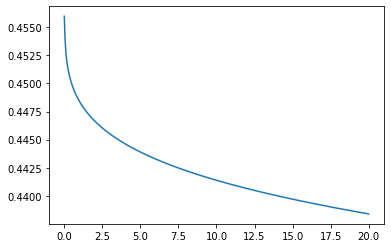

In [30]:
plt.plot(time,l2norm)
plt.show()

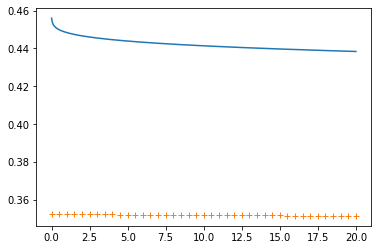

In [34]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_LAXWENDROFF.dat', comments='#')
#plt.plot(time,(l2norm/l2norm[0])) #normalizzare....
plt.plot(time,(l2norm))
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.show()